In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import pandas as pd
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
def setupkde(order,run,burn):
    ws = np.load('../sf/m'+str(order)+'/output/mix_emcee/run0'+str(run)+'/emcee_chain.npy')
    burned = ws[:, burn:,:]
    xs, ys, zs = burned.shape
    fc = burned.reshape(xs*ys, zs)
    nx, ny = fc.shape
    f_omega = 10**fc[:, 7] / (10**fc[:, 5] + 10**fc[:,7])
    burnedT2 = ws[:, burn:, 6] 
    Txs, Tys = burnedT2.shape
    T2 = burnedT2.reshape(Txs*Tys)
    return f_omega, T2

In [57]:
df = pd.read_csv('../sf/m118/output/mix_emcee/run02/models_ff-05_50_95.csv')

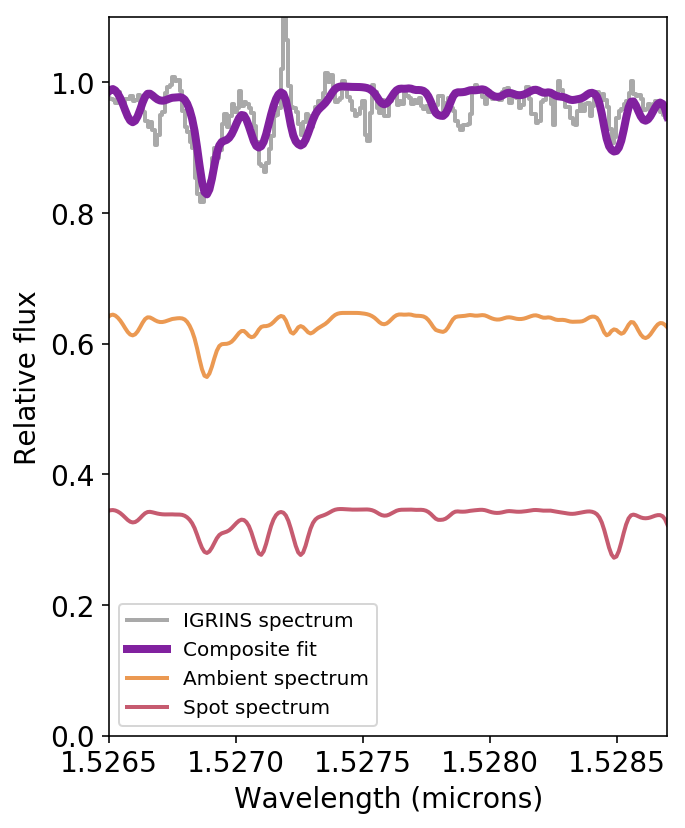

In [58]:
plt.rc('font', size=14)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=10)
plt.rc('figure', titlesize=16)

plt.figure(figsize=(5,6))
plt.step(df.wl / 10000, df.data * (1. / 0.3), 
         label='IGRINS spectrum', color='#A9A9A9', linewidth=2)
plt.plot(df.wl / 10000, df.model_comp95* (1. / 0.3), 
         label='Composite fit', linewidth=4, color='#81219F')
plt.plot(df.wl / 10000, df.model_hot95* (1. / 0.3), 
         label='Ambient spectrum', color='#EB9952',linewidth=2)
plt.plot(df.wl / 10000, df.model_cool95* (1. / 0.3), 
         label='Spot spectrum', color='#C65B70', linewidth=2)
plt.xlim(1.5265,1.5287)
plt.ylim(0.0,1.1)
plt.xlabel("Wavelength (microns)")
plt.ylabel("Relative flux")
plt.legend(loc='best')
#plt.title("Spots on a Sub-subgiant")
plt.tight_layout()
plt.savefig("../results/figs/Spotspec_order118.pdf", dpi=300, transparent=True);

In [64]:
df = pd.read_csv('../sf/m110/output/mix_emcee/run02/models_ff-05_50_95.csv')
df.head()

,data,wl,model_comp05,model_cool05,model_hot05,model_comp50,model_cool50,model_hot50,model_comp95,model_cool95,model_hot95
0,0.256071,16225.928217,0.259499,0.003806,0.255693,0.254491,0.035430,0.219061,0.263936,0.089321,0.174615
1,0.260587,16226.046478,0.259246,0.003804,0.255443,0.254528,0.035596,0.218932,0.263808,0.089327,0.174481
2,0.255943,16226.164722,0.258895,0.003788,0.255106,0.254186,0.035521,0.218665,0.263374,0.089115,0.174259
3,0.250582,16226.282950,0.258590,0.003769,0.254821,0.253711,0.035338,0.218372,0.262889,0.088845,0.174043
4,0.235964,16226.401161,0.258320,0.003749,0.254572,0.253238,0.035110,0.218128,0.262403,0.088517,0.173885


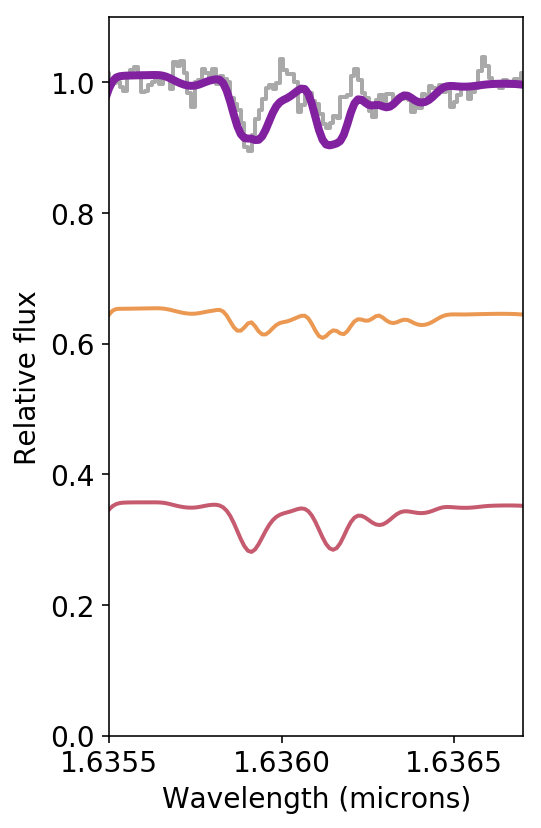

In [37]:
plt.rc('font', size=14)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=10)
plt.rc('figure', titlesize=16)

plt.figure(figsize=(4,6))
plt.step(df.wl / 10000, df.data * (1. / 0.26), 
         label='IGRINS spectrum', color='#A9A9A9', linewidth=2)
plt.plot(df.wl / 10000, df.model_comp95* (1. / 0.26), 
         label='Composite fit', linewidth=4, color='#81219F')
plt.plot(df.wl / 10000, df.model_hot95* (1. / 0.26), 
         label='Ambient spectrum', color='#EB9952',linewidth=2)
plt.plot(df.wl / 10000, df.model_cool95* (1. / 0.26), 
         label='Spot spectrum', color='#C65B70', linewidth=2)
plt.xlim(1.6355,1.6367)
plt.ylim(0.0,1.1)
plt.xlabel("Wavelength (microns)")
plt.ylabel("Relative flux")
#plt.legend(loc='best')
plt.tight_layout()
plt.savefig("../results/figs/Spotspec_order110.pdf", dpi=300, transparent=True);

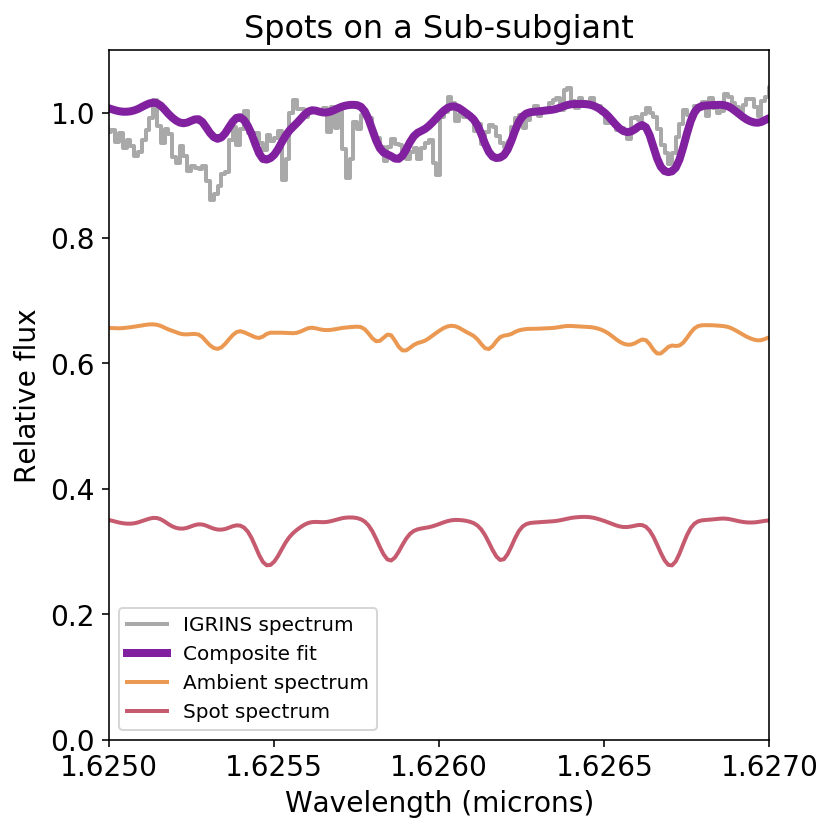

In [27]:
plt.figure(figsize=(6,6))
plt.step(df.wl / 10000, df.data * (1. / 0.26), 
         label='IGRINS spectrum', color='#A9A9A9', linewidth=2)
plt.plot(df.wl / 10000, df.model_comp95* (1. / 0.26), 
         label='Composite fit', linewidth=4, color='#81219F')
plt.plot(df.wl / 10000, df.model_hot95* (1. / 0.26), 
         label='Ambient spectrum', color='#EB9952',linewidth=2)
plt.plot(df.wl / 10000, df.model_cool95* (1. / 0.26), 
         label='Spot spectrum', color='#C65B70', linewidth=2)
plt.xlim(1.6250,1.6270)
plt.ylim(0.0,1.1)
plt.xlabel("Wavelength (microns)")
plt.ylabel("Relative flux")
plt.legend(loc='best')
plt.title("Spots on a Sub-subgiant")
plt.tight_layout();

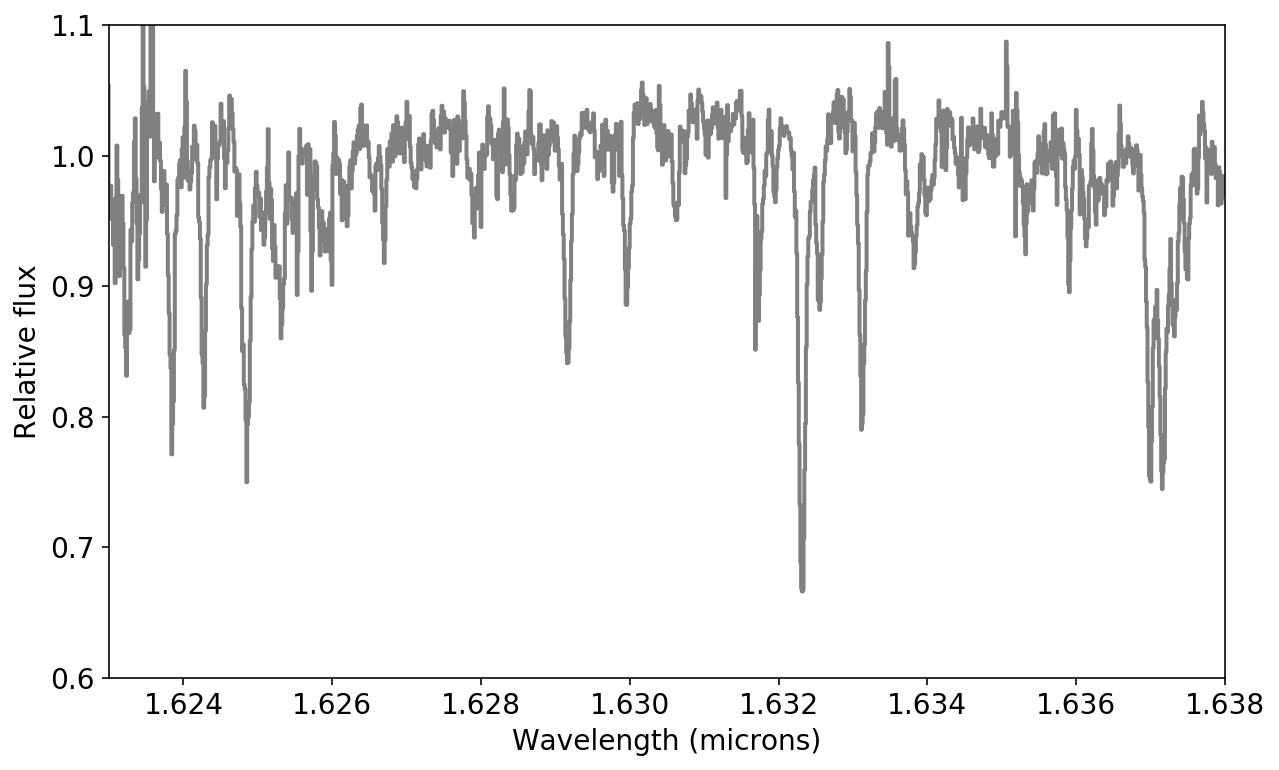

In [69]:
plt.figure(figsize=(10,6))
plt.step(df.wl / 10000, df.data * (1. / 0.26), 
         label='IGRINS spectrum', color='grey', linewidth=2)
plt.ylim(0.6,1.1)
plt.xlim(1.623,1.638)
plt.xlabel("Wavelength (microns)")
plt.ylabel("Relative flux")
plt.savefig("../results/figs/Order110_dataonly.pdf", dpi=300, transparent=True);

In [32]:
f_omega, T2 = setupkde(110,2,3000)

In [33]:
pal = sns.dark_palette("#E16560", as_cmap=True)
#pal = sns.palplot(sns.dark_palette("#FBA337"))

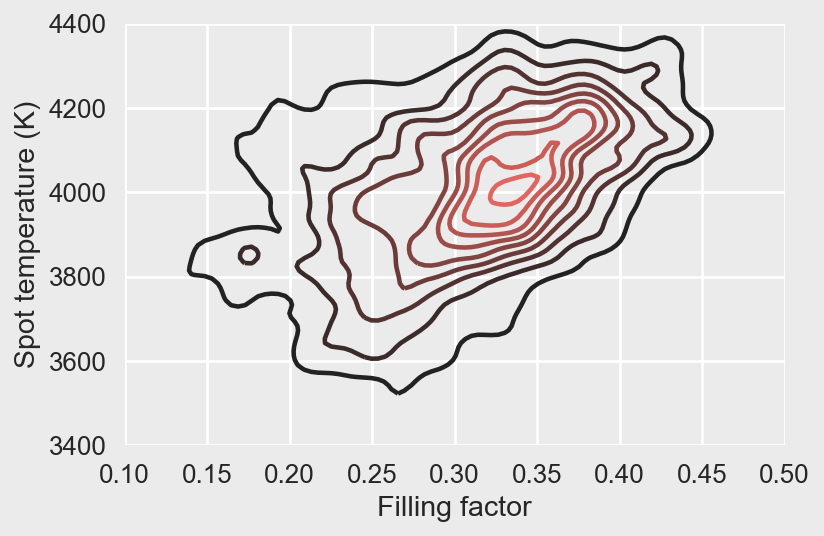

In [34]:

sns.set_context("talk")
sns.kdeplot(f_omega, T2, cmap=pal, clip=((0.1,0.5),(3400,4400)))
plt.xlabel("Filling factor")
plt.ylabel("Spot temperature (K)")
plt.tight_layout()
plt.savefig("../results/figs/Fillfactor_110.pdf", dpi=300);

In [26]:
f_omega, T2 = setupkde(118,2,2500)

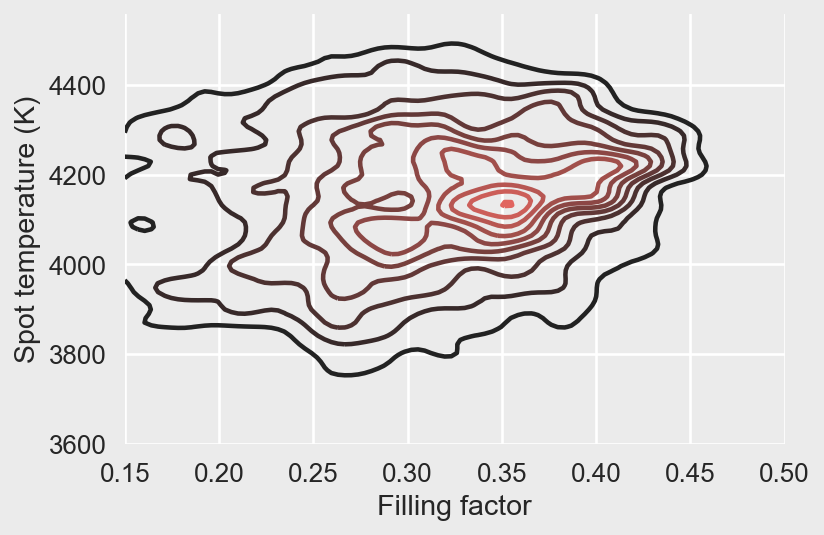

In [28]:
sns.set_context("talk")
sns.kdeplot(f_omega, T2, cmap=pal, clip=((0.15,0.5),(3600,4600)))
plt.xlabel("Filling factor")
plt.ylabel("Spot temperature (K)")
plt.tight_layout()
plt.savefig("../results/figs/Fillfactor_118.pdf", dpi=300);

In [38]:
df = pd.read_csv('../data/reduced/211414597.csv')

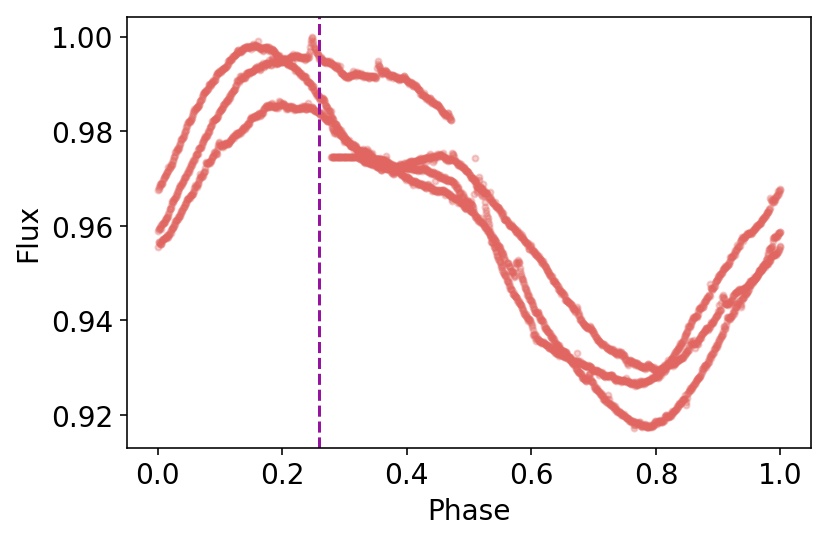

In [55]:
normflux = np.array(df.singleScaleFluxValues / np.max(df.singleScaleFluxValues))
period = 23.43420127
obs = np.array(57138.64)
obsphase = np.mod(obs,period) / period

plt.plot(np.mod(df.cadenceTimes,period) / period, normflux, '.', alpha=0.3, color='#E16560')
plt.axvline(obsphase, linestyle='dashed', color='#9613A0')
plt.xlabel("Phase")
plt.ylabel("Flux")
plt.tight_layout()
plt.savefig("../results/figs/phased_lightcurve.pdf", dpi=300, transparent=True);

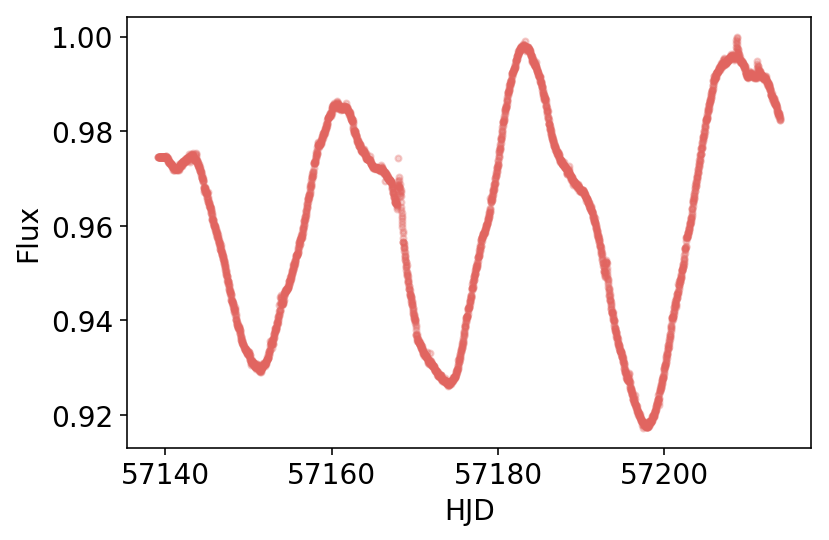

In [56]:
plt.plot(df.cadenceTimes, normflux, '.', alpha=0.3, color='#E16560')
#plt.axvline(obsphase, linestyle='dashed', color='k')
plt.xlabel("HJD")
plt.ylabel("Flux")
plt.tight_layout()
plt.savefig("../results/figs/lightcurve.pdf", dpi=300, transparent=True);